In [7]:
import numpy as np
import math
from scipy.stats import norm
from Code.pde_solver import PDE_Solver
from Code.bs_solver import BlackScholes_Solver
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook

In [2]:
def g_eu_call(s):
    return np.maximum(s - E,0)

def g_eu_put(s):
    return np.maximum(E - s,0)

def g_cash_or_nothing(s):
    res = np.zeros(s.shape[0])
    for i in range(s.shape[0]):
        if s[i] >= E:
            res[i] = B
    return res

def g_cash_or_nothing_put(s):
    res = np.zeros(s.shape[0])
    for i in range(s.shape[0]):
        if s[i] < E:
            res[i] = B
    return res

def g_asset_call(s):
    res = np.zeros(s.shape[0])
    for i in range(s.shape[0]):
        if s[i] >= E:
            res[i] = s[i]
    return res

def d_plus(cur_t, s):
    return (math.log(s / E) + (r + (gamma ** 2 / 2.)) * (T_prime - cur_t)) / (gamma * math.sqrt(T_prime - cur_t))

def d_minus(cur_t, s):
    return (math.log(s / E) + (r - (gamma ** 2 / 2.)) * (T_prime - cur_t)) / (gamma * math.sqrt(T_prime - cur_t))

def c_eu_call(s, cur_t):
    return s * norm.cdf(d_plus(cur_t, s)) - E * math.exp(-r * (T_prime - cur_t)) * norm.cdf(d_minus(cur_t, s))

def c_eu_put(s, cur_t):
    return E * math.exp(-r * (T_prime - cur_t)) * norm.cdf(-d_minus(cur_t, s)) - s * norm.cdf(-d_plus(cur_t, s))

def c_cash_or_nothing_call(s, cur_t):
    return B * np.exp(-r * (T_prime - cur_t)) * norm.cdf(d_minus(cur_t, s))

def c_cash_or_nothing_put(s, cur_t):
    return B * np.exp(-r * (T_prime - cur_t)) * norm.cdf(-d_minus(cur_t, s))

def c_asset_or_nothing_call(s, cur_t):
    return s * norm.cdf(d_plus(cur_t, s))

def get_time_grid(t_var, M):
    tt = np.array(t_var)
    tt = np.reshape(tt, [1, tt.shape[0]])
    tt_row = tt
    for i in range(M):
        tt = np.append(tt, tt_row, axis = 0)
    tt = tt * T_prime 
    return tt

def visualize_analytical_solution(cur_type, costs, tt):
    if cur_type == 'europ_call':
        cur_fun = c_eu_call
    if cur_type == 'europ_put':
        cur_fun = c_eu_put
    if cur_type == 'cash_or_nothing_call':
        cur_fun = c_cash_or_nothing_call
    if cur_type == 'asset_or_nothing_call':
        cur_fun = c_asset_or_nothing_call
    if cur_type == 'cash_or_nothing_put':
        cur_fun = c_cash_or_nothing_put
    f_1 = np.zeros([costs.shape[0],costs.shape[1]-1])
    for j in range(costs.shape[1]-1):
        for i in range(costs.shape[0]):
            f_1[i, j] = cur_fun(costs[i, j + 1], tt[i, j])
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_wireframe(tt, costs[:,1:],  f_1, color='purple')
    ax.set_xlabel('Time')
    ax.set_ylabel('Stock Price')
    ax.set_zlabel('Option Value')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    plt.show()
    
def visualize_numerical_solution(costs, tt, values, costs_grid, g):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_wireframe(tt, costs[:,1:], values[:,1:],color='purple')
    ax.plot(np.ones(M+1) * T_prime, costs_grid, g(costs_grid),linewidth = 4,color='blue')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('Time')
    ax.set_ylabel('Stock Price')
    ax.set_zlabel('Option Value')
    plt.show()
    
def visualize_difference(cur_type, costs, tt, values):
    if cur_type == 'europ_call':
        cur_fun = c_eu_call
    if cur_type == 'europ_put':
        cur_fun = c_eu_put
    if cur_type == 'cash_or_nothing_call':
        cur_fun = c_cash_or_nothing_call
    if cur_type == 'asset_or_nothing_call':
        cur_fun = c_asset_or_nothing_call
    if cur_type == 'cash_or_nothing_put':
        cur_fun = c_cash_or_nothing_put
    f_1 = np.zeros([costs.shape[0],costs.shape[1]-1])
    for j in range(costs.shape[1]-1):
        for i in range(costs.shape[0]):
            f_1[i, j] = cur_fun(costs[i, j + 1], tt[i, j])
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_wireframe(tt, costs[:,1:], values[:,1:] - f_1, color='purple')
    ax.set_xlabel('Time')
    ax.set_ylabel('Stock Price')
    ax.set_zlabel('Option Values Difference')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    plt.show()



In [3]:
gamma = 0.4
r = 0.1
T_prime = 5.
t = 0
T = T_prime - t
a_x = 0.5
exp_a_x = np.e ** a_x
E = 1.
B = 1.
sigma = 0.5 * (gamma ** 2)

f = lambda x : np.exp( 1. / (gamma**2) * (r - (0.5) * gamma ** 2) * x ) * g(np.exp(x))
V = lambda x,t : r + 0.5 / (gamma**2) * (r - (0.5) * gamma ** 2) ** 2

print "sigma = ", sigma
print "V = ", r + 0.5 / (gamma**2) * (r - (0.5) * gamma ** 2) ** 2
print "T = ", T_prime-t

sigma =  0.08
V =  0.10125
T =  5.0


## European call

<IPython.core.display.Javascript object>


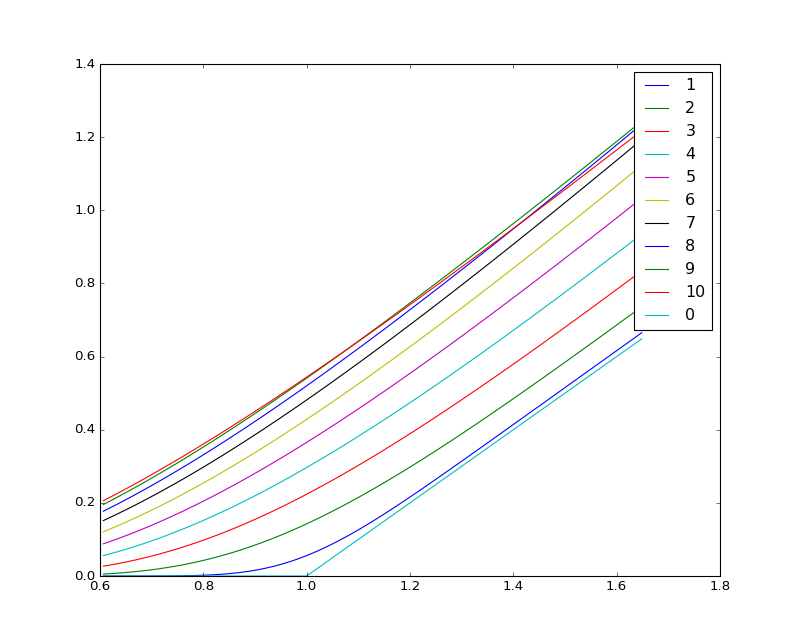

In [4]:
plt.figure(figsize=(10,8))

t_variants = [0.98, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
M = 100
tt=get_time_grid(t_variants, M)


Function_values = np.reshape(np.array([None] * 101),[101,1])
costs = np.reshape(np.array([None] * 101),[101,1])

labels = [str(i) for i in xrange(1, len(t_variants)+1)] + ['0']
for i in xrange(len(t_variants)):
    bs = BlackScholes_Solver(gamma=gamma, r=r, g=g_eu_call, T_prime=T_prime, t=t_variants[i] * T_prime, n=20, exp_a_x=exp_a_x, M=100)
    bs.Solve()
    costs = np.append(costs, np.reshape(np.array(bs.s), [101, 1]), axis = 1)
    Function_values = np.append(Function_values, np.reshape(np.array(bs.c), [101, 1]), axis = 1)
    plt.plot(bs.s, bs.c, label=labels[i])

plt.plot(bs.s, g_eu_call(bs.s), label = labels[-1])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


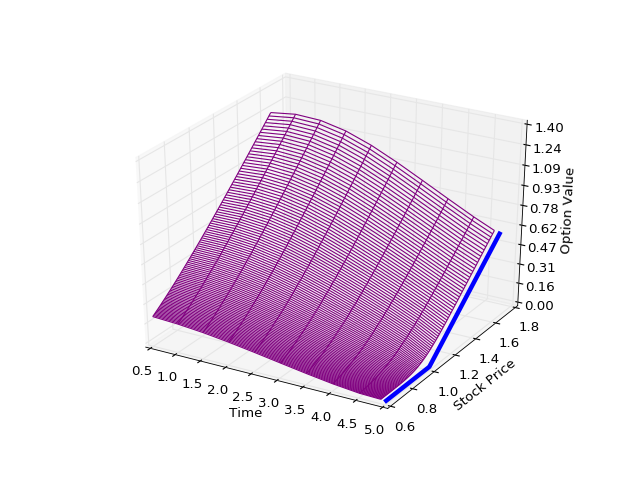

In [8]:
visualize_numerical_solution(costs, tt, Function_values, bs.s, g_eu_call)

<IPython.core.display.Javascript object>


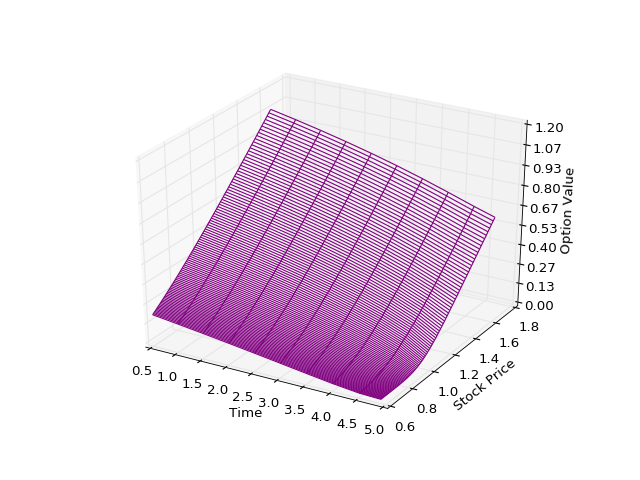

In [9]:
visualize_analytical_solution('europ_call', costs, tt)

<IPython.core.display.Javascript object>


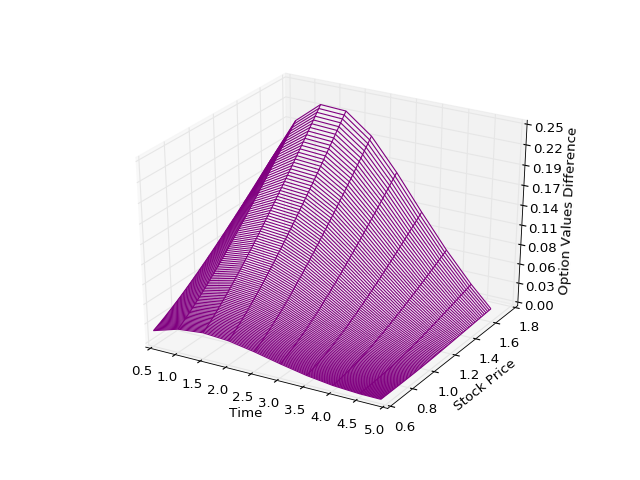

In [10]:
visualize_difference('europ_call', costs, tt, Function_values)

## European put

<IPython.core.display.Javascript object>


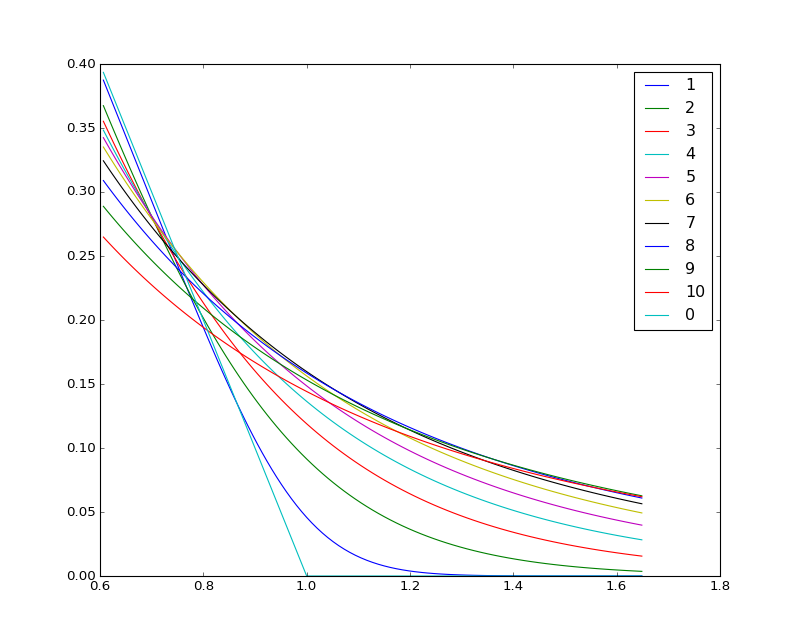

In [11]:
plt.figure(figsize=(10,8))

t_variants = [0.98, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
M = 100
tt = get_time_grid(t_variants, M) 

Function_values = np.reshape(np.array([None] * (M+1)),[(M+1),1])
costs = np.reshape(np.array([None] * (M+1)),[(M+1),1])

labels = [str(i) for i in xrange(1, len(t_variants)+1)] + ['0']
for i in xrange(len(t_variants)):
    bs = BlackScholes_Solver(gamma=gamma, r=r, g=g_eu_put, T_prime=T_prime, t=t_variants[i]*T_prime, n=20, exp_a_x=exp_a_x, M=100)
    bs.Solve()
    costs = np.append(costs, np.reshape(np.array(bs.s), [(M+1), 1]), axis = 1)
    Function_values = np.append(Function_values, np.reshape(np.array(bs.c), [(M+1), 1]), axis = 1)
    plt.plot(bs.s, bs.c, label=labels[i])

plt.plot(bs.s, g_eu_put(bs.s), label = labels[-1])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


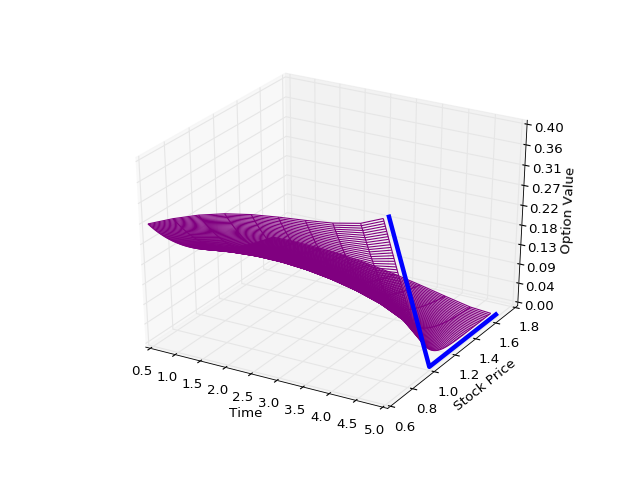

In [12]:
visualize_numerical_solution(costs, tt, Function_values, bs.s, g_eu_put)

<IPython.core.display.Javascript object>


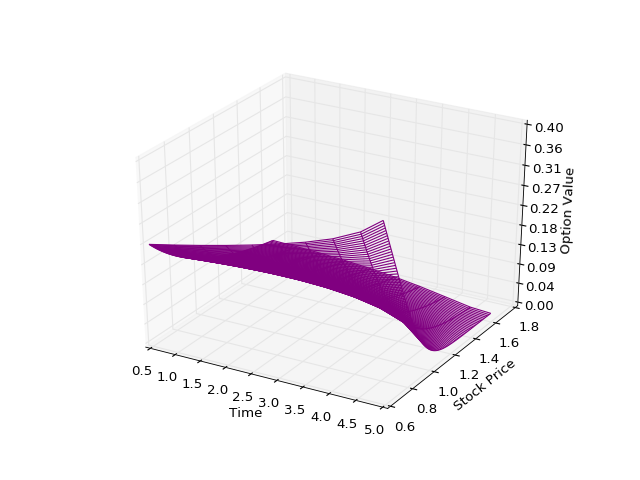

In [13]:
visualize_analytical_solution('europ_put', costs, tt)

<IPython.core.display.Javascript object>


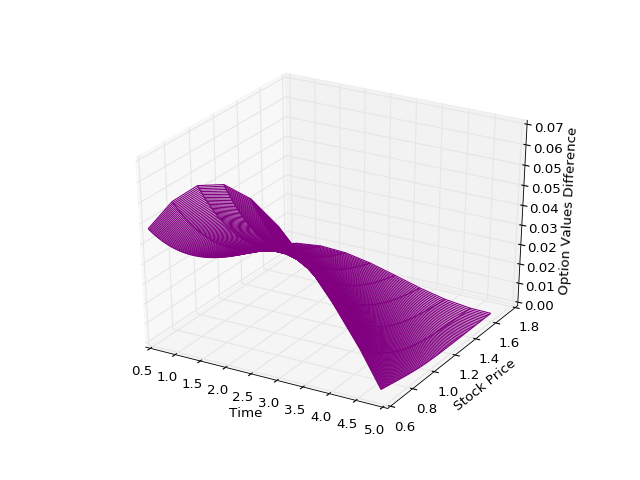

In [14]:
visualize_difference('europ_put', costs, tt, Function_values)

## Cash-or-nothing call

<IPython.core.display.Javascript object>


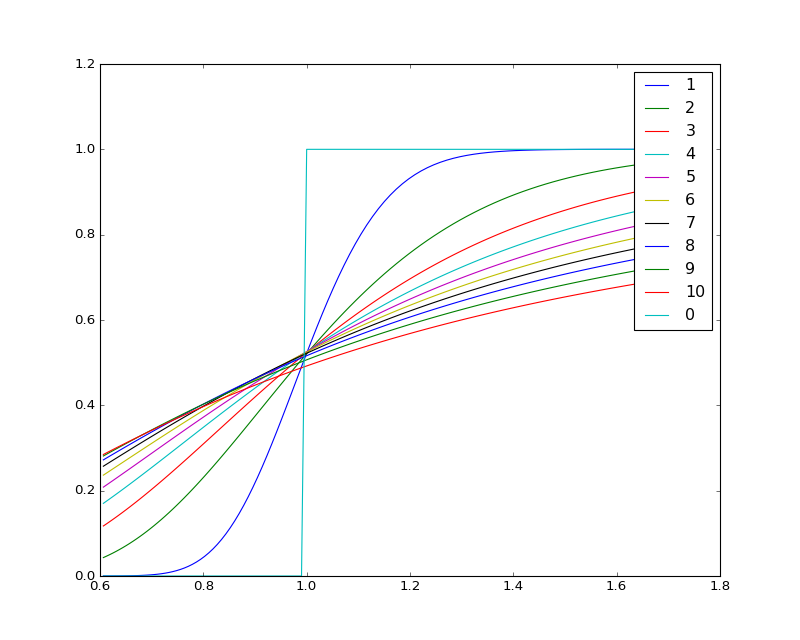

In [15]:
plt.figure(figsize=(10,8))

t_variants = [0.98, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
M = 100
tt = get_time_grid(t_variants, M)
 

Function_values = np.reshape(np.array([None] * (M+1)),[M+1,1])
costs = np.reshape(np.array([None] * (M+1)),[M+1,1])

labels = [str(i) for i in xrange(1, len(t_variants)+1)] + ['0']
for i in xrange(len(t_variants)):
    bs = BlackScholes_Solver(gamma=gamma, r=r, g=g_cash_or_nothing, T_prime=T_prime, t=t_variants[i]*T_prime, n=30, exp_a_x=exp_a_x, M=100)
    bs.Solve()
    costs = np.append(costs, np.reshape(np.array(bs.s), [M+1, 1]), axis = 1)
    Function_values = np.append(Function_values, np.reshape(np.array(bs.c), [M+1,1]), axis = 1)
    plt.plot(bs.s, bs.c, label=labels[i])

plt.plot(bs.s, g_cash_or_nothing(bs.s), label = labels[-1])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


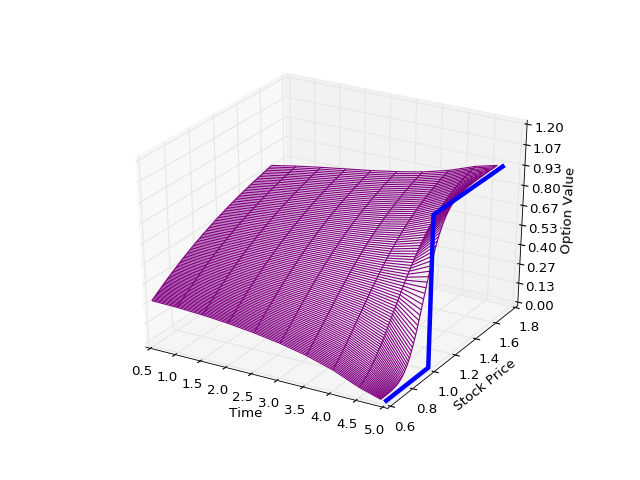

In [16]:
visualize_numerical_solution(costs, tt, Function_values, bs.s, g_cash_or_nothing)

<IPython.core.display.Javascript object>


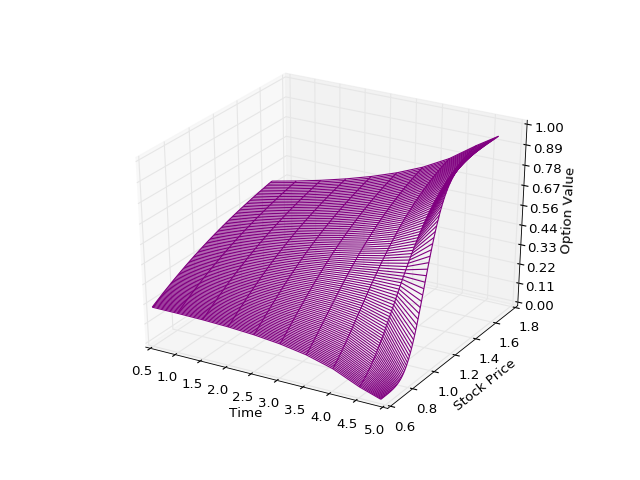

In [17]:
visualize_analytical_solution('cash_or_nothing_call', costs, tt)

<IPython.core.display.Javascript object>


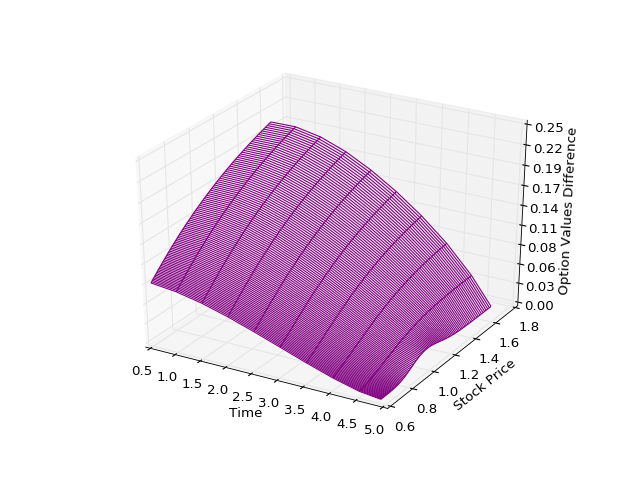

In [18]:
visualize_difference('cash_or_nothing_call', costs, tt, Function_values)

## Cash-or-nothing put

<IPython.core.display.Javascript object>


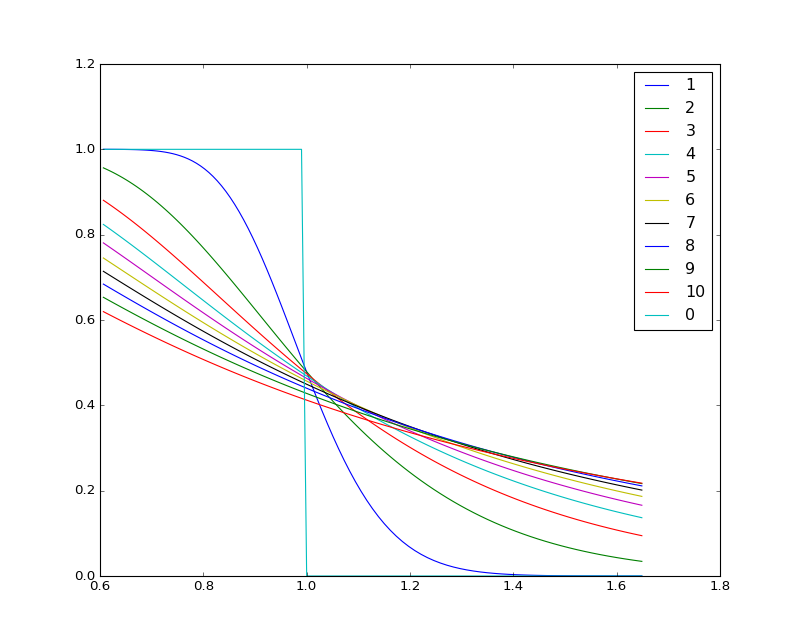

In [19]:
plt.figure(figsize=(10,8))

t_variants = [0.98, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
M = 100
tt = get_time_grid(t_variants, M)
 

Function_values = np.reshape(np.array([None] * (M+1)),[M+1,1])
costs = np.reshape(np.array([None] * (M+1)),[M+1,1])

labels = [str(i) for i in xrange(1, len(t_variants)+1)] + ['0']
for i in xrange(len(t_variants)):
    bs = BlackScholes_Solver(gamma=gamma, r=r, g=g_cash_or_nothing_put, T_prime=T_prime, t=t_variants[i]*T_prime, n=30, exp_a_x=exp_a_x, M=100)
    bs.Solve()
    costs = np.append(costs, np.reshape(np.array(bs.s), [M+1, 1]), axis = 1)
    Function_values = np.append(Function_values, np.reshape(np.array(bs.c), [M+1,1]), axis = 1)
    plt.plot(bs.s, bs.c, label=labels[i])

plt.plot(bs.s, g_cash_or_nothing_put(bs.s), label = labels[-1])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


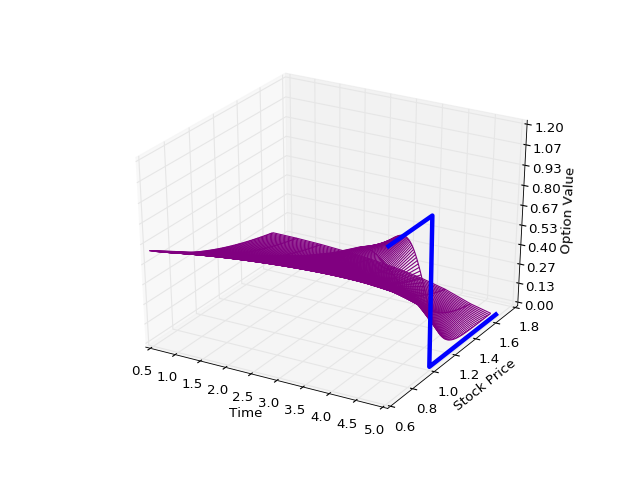

In [20]:
visualize_numerical_solution(costs, tt, Function_values, bs.s, g_cash_or_nothing_put)

<IPython.core.display.Javascript object>


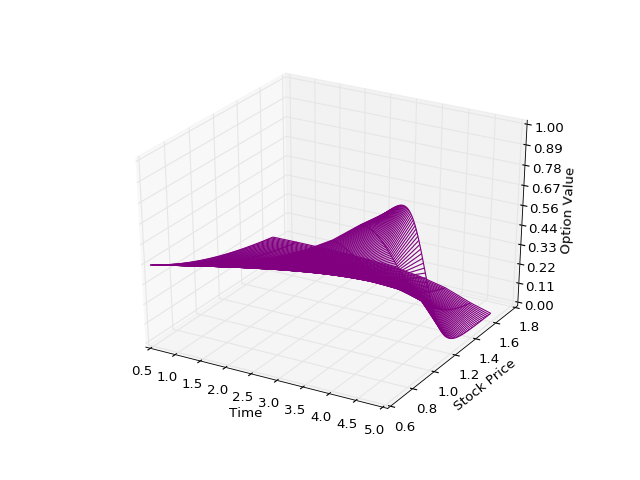

In [21]:
visualize_analytical_solution('cash_or_nothing_put', costs, tt)

<IPython.core.display.Javascript object>


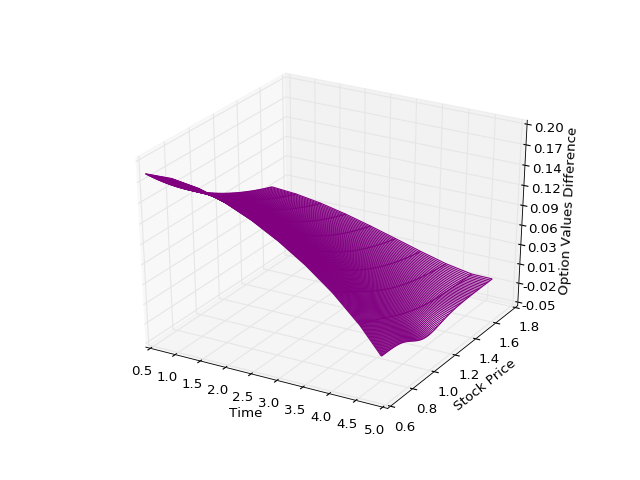

In [22]:
visualize_difference('cash_or_nothing_put', costs, tt, Function_values)

## Asset-or-nothing call

<IPython.core.display.Javascript object>


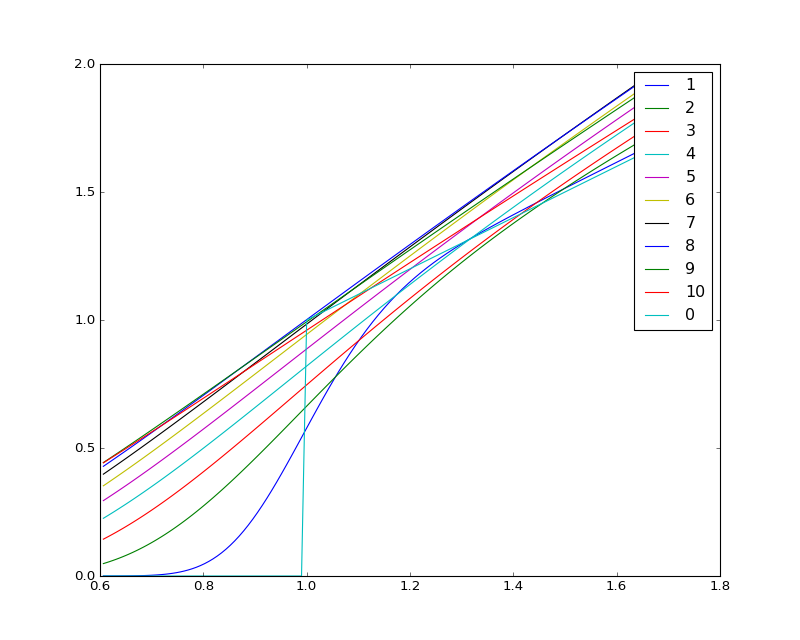

In [23]:
plt.figure(figsize=(10,8))

t_variants = [0.98, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
M = 100
tt=get_time_grid(t_variants, M) 

Function_values = np.reshape(np.array([None] * (M+1)),[(M+1),1])
costs = np.reshape(np.array([None] * (M+1)),[(M+1),1])

labels = [str(i) for i in xrange(1, len(t_variants)+1)] + ['0']
for i in xrange(len(t_variants)):
    bs = BlackScholes_Solver(gamma=gamma, r=r, g=g_asset_call, T_prime=T_prime, t=t_variants[i]*T_prime, n=20, exp_a_x=exp_a_x, M=100)
    bs.Solve()
    costs = np.append(costs, np.reshape(np.array(bs.s), [(M+1),1]), axis = 1)
    Function_values = np.append(Function_values, np.reshape(np.array(bs.c), [(M+1), 1]), axis = 1)
    plt.plot(bs.s, bs.c, label=labels[i])

plt.plot(bs.s, g_asset_call(bs.s), label = labels[-1])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


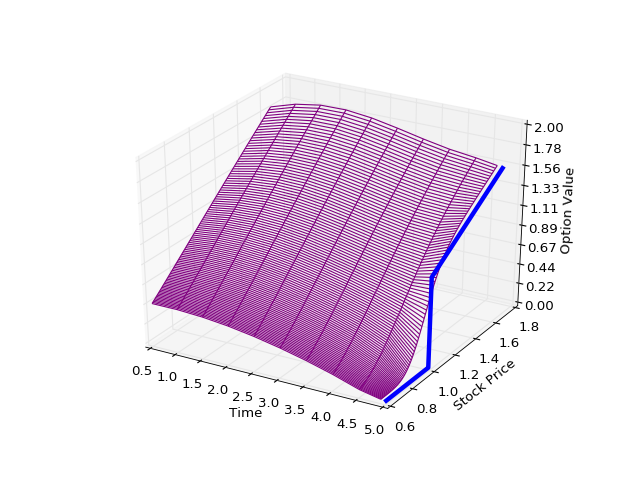

In [24]:
visualize_numerical_solution(costs, tt, Function_values, bs.s, g_asset_call)

<IPython.core.display.Javascript object>


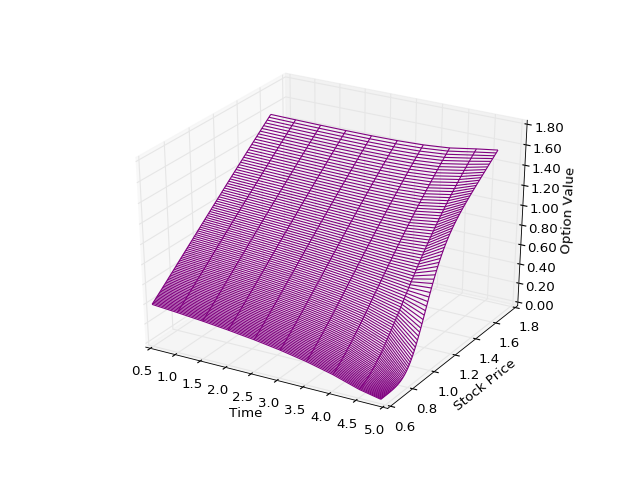

In [25]:
visualize_analytical_solution('asset_or_nothing_call', costs, tt)

<IPython.core.display.Javascript object>


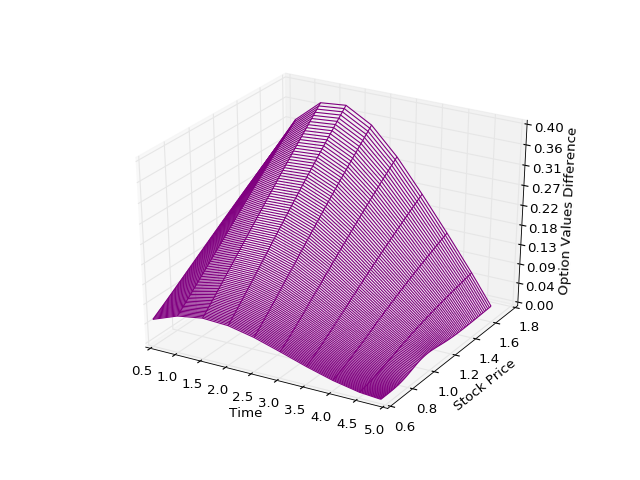

In [26]:
visualize_difference('asset_or_nothing_call', costs, tt, Function_values)